<a href="https://colab.research.google.com/github/MOUNESH-M/Explainable-Tomato-Leaf-Disease-Detection-with-Multilingual-Chatbot-based-Advisory/blob/main/XAI_tomato_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mouneshm","key":"b3be17fc2d43d4844ae0579c90910e14"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d charuchaudhry/plantvillage-tomato-leaf-dataset
!unzip -q plantvillage-tomato-leaf-dataset.zip -d /content/tomato_data

Dataset URL: https://www.kaggle.com/datasets/charuchaudhry/plantvillage-tomato-leaf-dataset
License(s): unknown
 95% 420M/443M [00:00<00:00, 412MB/s]
100% 443M/443M [00:00<00:00, 479MB/s]


In [5]:
!ls /content/tomato_data
!find /content/tomato_data -maxdepth 2 -type d

plantvillage
/content/tomato_data
/content/tomato_data/plantvillage
/content/tomato_data/plantvillage/Tomato___Target_Spot
/content/tomato_data/plantvillage/plantvillage
/content/tomato_data/plantvillage/Tomato___Early_blight
/content/tomato_data/plantvillage/Tomato___Late_blight
/content/tomato_data/plantvillage/Tomato___Spider_mites Two-spotted_spider_mite
/content/tomato_data/plantvillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/tomato_data/plantvillage/Tomato___Septoria_leaf_spot
/content/tomato_data/plantvillage/Tomato___Bacterial_spot
/content/tomato_data/plantvillage/Tomato___healthy
/content/tomato_data/plantvillage/Tomato___Leaf_Mold
/content/tomato_data/plantvillage/Tomato___Tomato_mosaic_virus


In [6]:
data_dir = "/content/tomato_data/plantvillage"

In [7]:
import shutil, os

root_path = "/content/tomato_data/plantvillage/plantvillage"
target_path = "/content/tomato_data/plantvillage"

# Move everything from nested folder up
for item in os.listdir(root_path):
    s = os.path.join(root_path, item)
    d = os.path.join(target_path, item)
    if os.path.exists(d):
        print(f"Skipping {d}, already exists")
    else:
        shutil.move(s, d)

print("Moved nested files up")


Skipping /content/tomato_data/plantvillage/Tomato___Target_Spot, already exists
Skipping /content/tomato_data/plantvillage/Tomato___Early_blight, already exists
Skipping /content/tomato_data/plantvillage/Tomato___Late_blight, already exists
Skipping /content/tomato_data/plantvillage/Tomato___Spider_mites Two-spotted_spider_mite, already exists
Skipping /content/tomato_data/plantvillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus, already exists
Skipping /content/tomato_data/plantvillage/Tomato___Septoria_leaf_spot, already exists
Skipping /content/tomato_data/plantvillage/Tomato___Bacterial_spot, already exists
Skipping /content/tomato_data/plantvillage/Tomato___healthy, already exists
Skipping /content/tomato_data/plantvillage/Tomato___Leaf_Mold, already exists
Skipping /content/tomato_data/plantvillage/Tomato___Tomato_mosaic_virus, already exists
Moved nested files up


In [8]:
import shutil
shutil.rmtree("/content/tomato_data/plantvillage/plantvillage", ignore_errors=True)
print("Removed extra nested plantvillage folder")


Removed extra nested plantvillage folder


In [9]:
!find /content/tomato_data/plantvillage -maxdepth 1 -type d


/content/tomato_data/plantvillage
/content/tomato_data/plantvillage/Tomato___Target_Spot
/content/tomato_data/plantvillage/Tomato___Early_blight
/content/tomato_data/plantvillage/Tomato___Late_blight
/content/tomato_data/plantvillage/Tomato___Spider_mites Two-spotted_spider_mite
/content/tomato_data/plantvillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/tomato_data/plantvillage/Tomato___Septoria_leaf_spot
/content/tomato_data/plantvillage/Tomato___Bacterial_spot
/content/tomato_data/plantvillage/Tomato___healthy
/content/tomato_data/plantvillage/Tomato___Leaf_Mold
/content/tomato_data/plantvillage/Tomato___Tomato_mosaic_virus


In [10]:
import os
import shutil
import random

# Paths
base_dir = "/content/tomato_data"
dataset_dir = os.path.join(base_dir, "plantvillage")
split_dir = os.path.join(base_dir, "tomato_split")

# Create new split folders
for split in ["train", "val", "test"]:
    split_path = os.path.join(split_dir, split)
    os.makedirs(split_path, exist_ok=True)

# Split each class
for cls in os.listdir(dataset_dir):
    cls_path = os.path.join(dataset_dir, cls)
    if not os.path.isdir(cls_path):
        continue

    images = os.listdir(cls_path)
    random.shuffle(images)

    train_split = int(0.7 * len(images))
    val_split = int(0.85 * len(images))

    splits = {
        "train": images[:train_split],
        "val": images[train_split:val_split],
        "test": images[val_split:]
    }

    for split, files in splits.items():
        split_cls_path = os.path.join(split_dir, split, cls)
        os.makedirs(split_cls_path, exist_ok=True)
        for f in files:
            shutil.copy(os.path.join(cls_path, f), os.path.join(split_cls_path, f))

print("Dataset successfully split into Train/Val/Test")


Dataset successfully split into Train/Val/Test


In [11]:
!find /content/tomato_data/tomato_split -maxdepth 2 -type d -exec sh -c 'echo "{}: $(ls -1 {} | wc -l)"' \;


/content/tomato_data/tomato_split: 3
/content/tomato_data/tomato_split/test: 10
/content/tomato_data/tomato_split/test/Tomato___Target_Spot: 169
/content/tomato_data/tomato_split/test/Tomato___Early_blight: 120
/content/tomato_data/tomato_split/test/Tomato___Late_blight: 230
ls: cannot access '/content/tomato_data/tomato_split/test/Tomato___Spider_mites': No such file or directory
ls: cannot access 'Two-spotted_spider_mite': No such file or directory
/content/tomato_data/tomato_split/test/Tomato___Spider_mites Two-spotted_spider_mite: 0
/content/tomato_data/tomato_split/test/Tomato___Tomato_Yellow_Leaf_Curl_Virus: 643
/content/tomato_data/tomato_split/test/Tomato___Septoria_leaf_spot: 213
/content/tomato_data/tomato_split/test/Tomato___Bacterial_spot: 256
/content/tomato_data/tomato_split/test/Tomato___healthy: 191
/content/tomato_data/tomato_split/test/Tomato___Leaf_Mold: 115
/content/tomato_data/tomato_split/test/Tomato___Tomato_mosaic_virus: 45
/content/tomato_data/tomato_split/val:

In [22]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


IMG_SIZE = (128,128)   # smaller for simple CNN
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    "/content/tomato_data/tomato_split/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = val_test_datagen.flow_from_directory(
    "/content/tomato_data/tomato_split/val",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = val_test_datagen.flow_from_directory(
    "/content/tomato_data/tomato_split/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

num_classes = train_gen.num_classes


Found 10166 images belonging to 10 classes.
Found 2179 images belonging to 10 classes.
Found 2184 images belonging to 10 classes.


In [23]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,930 (12.61 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
EPOCHS = 20

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 59s 171ms/step - accuracy: 0.3988 - loss: 1.7814 - val_accuracy: 0.6035 - val_loss: 1.1692
Epoch 2/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 49s 155ms/step - accuracy: 0.6564 - loss: 1.0181 - val_accuracy: 0.7715 - val_loss: 0.6526
Epoch 3/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 50s 157ms/step - accuracy: 0.7290 - loss: 0.8093 - val_accuracy: 0.8206 - val_loss: 0.5216
Epoch 4/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 51s 160ms/step - accuracy: 0.7606 - loss: 0.7156 - val_accuracy: 0.7237 - val_loss: 0.8732
Epoch 5/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 50s 156ms/step - accuracy: 0.7895 - loss: 0.6229 - val_accuracy: 0.8660 - val_loss: 0.3752
Epoch 6/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 51s 162ms/step - accuracy: 0.8153 - loss: 0.5333 - val_accuracy: 0.8059 - val_loss: 0.5469
Epoch 7/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step - accuracy: 0.8244 - loss: 0.4884 - val_accuracy: 0.7361 - val_loss: 0.7579
Epoch 8/20
318/318 ━━━━━━━━━━━━━━━━━━━━ 51s 161ms/step - accuracy: 0.8433 - loss: 0

In [25]:
test_loss, test_acc = model.evaluate(test_gen)
print("Simple CNN Test Accuracy:", test_acc)

69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.8956 - loss: 0.3105
Simple CNN Test Accuracy: 0.930402934551239


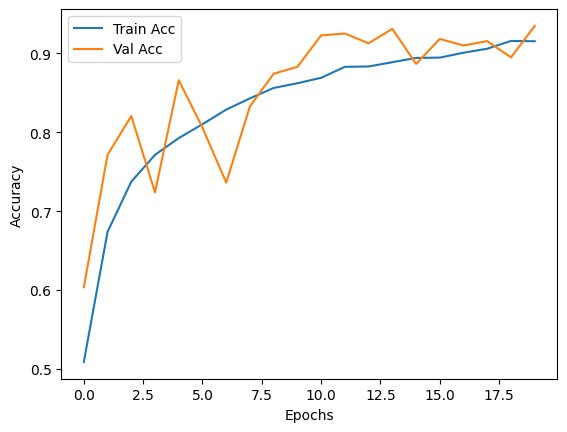

In [27]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()